# Project: Wrangling and Analyze Data

In [1]:
# Importing the relevant libraries
import pandas as pd 
import numpy as np
import tweepy
import glob
import requests
import os
import seaborn as sns
import json 
from functools import reduce
import random
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Gathering Data

### Twitter archive file


In [2]:
#reading the twitter csv file after downloading manually
df_twitter =pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# assessing the first 5 of the data
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tweet image prediction


In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [5]:
#Reading TSV file
df_image_prediction = pd.read_csv('image_predictions.tsv', sep='\t' )

In [6]:
# assessing first 5 of the data 
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter API & JSON
NOTE I had mobile verification issues so I used the tweet-json.txt fie provided by udacity

In [7]:
'''import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict) '''


'import tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.tw

#### Tweepy keys and token

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

#### collect Tweepy status object based on Tweet ID and store in list
list_of_tweets = []

#### Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []

with open('tweet_json.txt', 'w') as file:
    for tweet_id in list(archive_df['tweet_id']):
        try:
            tweet_status = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_status._json, file)
            file.write('\n')
            list_of_tweets.append(tweet_id)
        except Exception as e:
            cant_find_tweets_for_those_ids.append(tweet_id)
    

In [8]:
# loading the tweet json file after gathering 
df_tweet = pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')

In [9]:
# changing column name 'id' to 'tweet_id'
df_tweet['tweet_id'] = df_tweet['id']
# reduing data to only 'tweet_id' 'favorite_count', 'retweet_count'
df_tweet = df_tweet[['tweet_id', 'favorite_count', 'retweet_count']]

In [10]:
# assessing the first 5 of the data
df_tweet.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


# Assessing data

## Visual assessment

###  Assessing the twitter archive

In [11]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


###  Assessing the image prediction

In [12]:
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


###  Assessing the twitter-json

In [13]:
df_tweet

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


## Programmatic assessment


###  Assessing the twitter archive

In [14]:
##check datatype and columns number and names ***
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
# getting simple statistics of data
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
# checking for duplicates in the tweet_id column
sum(df_twitter.tweet_id.duplicated())

0

In [17]:
# counting how many time element in the 'name' column appears
df_twitter.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [18]:
# consider only orignal tweets (no retweets) 
df_twitter[df_twitter.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [19]:
df_twitter.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [20]:
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [21]:
# checking for rate denominator which are greater than 10
df_twitter[df_twitter.rating_denominator > 10 ]['rating_denominator']

342      15
433      70
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
Name: rating_denominator, dtype: int64

In [22]:
# summing all rating denominator which are greater than 10
(df_twitter.rating_denominator >10).sum()

20

In [23]:
# checking for rating numerator which are greater than 20
df_twitter[df_twitter.rating_numerator >20 ]['rating_numerator']

188      420
189      666
290      182
313      960
340       75
433       84
516       24
695       75
763       27
902      165
979     1776
1120     204
1202      50
1228      99
1254      80
1274      45
1351      60
1433      44
1634     143
1635     121
1712      26
1779     144
1843      88
2074     420
Name: rating_numerator, dtype: int64

In [24]:
# summing all rating numerator which are greater than 20
(df_twitter.rating_numerator >10).sum()

1455

In [25]:
# checking for all columns names
list(df_twitter)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [26]:
#checking for names that are stored as 'None'
df_twitter[df_twitter.name =='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [27]:
# checking for names name that less than 3 in length
df_twitter[df_twitter.name.apply(lambda i: len(str(i)) < 3)]['name']

56       a
393     Mo
446     Bo
449     Bo
553     Bo
        ..
2349    an
2350     a
2352     a
2353     a
2354     a
Name: name, Length: 79, dtype: object

#### Assessing the Image prediction

In [28]:
##check datatype and columns number and names ****
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
# Checking for duplicates in the column tweet_id
sum(df_image_prediction.tweet_id.duplicated())

0

In [30]:
# checking duplicates in the column @ jpg_url
sum(df_image_prediction.jpg_url.duplicated())

66

####  Assessing the tweet_status

In [31]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [32]:
# Checking for duplicates in the column tweet_id
sum(df_tweet.tweet_id.duplicated())

0

In [33]:
# Counting the number of retweets
df_tweet.retweet_count.count()

2354

# Quality Issues

#### twitter-archive

- the column 'tweet_id' is an integer
- the 'rating_denominator' column contains ratings more than 10
- the 'rating_numerator' column contains ratings more than 20
- the colmun 'names' contains  contaoins 'None' instead of NaN and some values have unusual names character lengths
- the column 'timestamp' is not 'datetime' datatype
- some unused columns for analysis

#### Image prediction

- There are some duplicate values in the 'jpg_url' column.
- There are invalid column names for 'p1', 'p2', and 'p3', p1_conf, p2_conf etc and some of the values of these columns contains underscores instead of spaces.

#### tweet-json

 - contains retweets not needed for analysis


# Tidiness Issues

- All three different dataframes should be in a single data set
- There are four different columns (doggo, floofer, pupper, and puppo) for dog stages



# Data Cleaning

In [34]:
# Making copies of all our gathered data 
df_twitter_copy = df_twitter.copy()
df_image_copy = df_image_prediction.copy()
df_tweet_copy = df_tweet.copy()

### Cleaning Tidiness issues

#### Define 
**Tidiness issue #1:** merging all dataframes into one

#### Code

In [35]:
# merging all dataframes into one
all_df = [df_twitter_copy, df_image_copy, df_tweet_copy]
twitter_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), all_df)

In [36]:
# checking the shape of the master dataframe
twitter_master.shape

(2073, 30)

#### Define
**Tidiness issue #2:** Create a single column for all dog stages

#### Code

In [37]:
twitter_master.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1753
1,None,None,None,puppo,23
2,None,None,pupper,None,210
3,None,floofer,None,None,7
4,doggo,None,None,None,67
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,11
7,doggo,floofer,None,None,1


In [38]:
twitter_master.doggo.replace('None', '', inplace=True)
twitter_master.doggo.replace(np.NaN, '', inplace=True)

twitter_master.floofer.replace('None', '', inplace=True)
twitter_master.floofer.replace(np.NaN, '', inplace=True)

twitter_master.pupper.replace('None', '', inplace=True)
twitter_master.pupper.replace(np.NaN, '', inplace=True)

twitter_master.puppo.replace('None', '', inplace=True)
twitter_master.puppo.replace(np.NaN, '', inplace=True)

In [39]:
twitter_master['stage'] = twitter_master.doggo + twitter_master.floofer + twitter_master.pupper + twitter_master.puppo
twitter_master.loc[twitter_master.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_master.loc[twitter_master.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_master.loc[twitter_master.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

#### Test

In [40]:
twitter_master.stage.value_counts()

                  1753
pupper             210
doggo               67
puppo               23
doggo, pupper       11
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

## Cleaning Quality issues

#### Define
- Quality issue #1: Changing the datatype of 'tweet_id' to string

#### Code

In [41]:
# Changing the datatype of 'tweet_id' to string
twitter_master.tweet_id = twitter_master.tweet_id.astype(str)

#### Test

In [42]:
twitter_master.tweet_id.dtypes

dtype('O')

#### Define
- Quality issue #2 correct rating_denominator (thus standard rate should 10)


#### Code

In [43]:
# looping through the rating_denominator and setting standard rate equal 10
for num in twitter_master.rating_denominator:
    if num > 10 or num < 10:
        twitter_master.rating_denominator=10.0

#### Test

In [44]:
twitter_master.rating_denominator

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
2068    10.0
2069    10.0
2070    10.0
2071    10.0
2072    10.0
Name: rating_denominator, Length: 2073, dtype: float64

#### Define

 - Quality issue #3: correct the rating_numerator (thus not more than 20) 

#### Code

In [45]:
for i in range(1,len(twitter_master['rating_numerator'])):
    if twitter_master['rating_numerator'].iloc[i] <= 20:continue
    elif twitter_master['rating_numerator'].iloc[i] > 20 and twitter_master['rating_numerator'].iloc[i] <= 200:
        twitter_master['rating_numerator'].iloc[i] = twitter_master['rating_numerator'].iloc[i]*0.1 
    elif twitter_master['rating_numerator'].iloc[i] > 200 and twitter_master['rating_numerator'].iloc[i] <= 1000: 
        twitter_master['rating_numerator'].iloc[i] = twitter_master['rating_numerator'].iloc[i]*0.01
    else:
        twitter_master['rating_numerator'].iloc[i] = random.randint(1, 19)

C:\Users\KING\AppData\Local\Temp\ipykernel_6676\1067006844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_master['rating_numerator'].iloc[i] = twitter_master['rating_numerator'].iloc[i]*0.1


#### Test

In [46]:
# checking the corrected rating_numerator 
sum(twitter_master.rating_numerator > 20)


0

#### Define
- Quality issue #4: Fixing all issues concerning the column 'name'

#### Code

In [47]:
# replacing all 'a' with NaN
for name in twitter_master.name:
    if name == "a":
        twitter_master.name = twitter_master.name.replace('a',np.nan)

In [48]:
# changing all 'None' to be NaN, np.nan
twitter_master.name = twitter_master.name.replace('None', np.nan)

In [49]:
# Capitailizing the names
twitter_master.name = twitter_master.name.str.capitalize()

### Test

In [50]:
# checking the counts for individual names
twitter_master.name.value_counts()

Charlie       11
Oliver        10
Cooper        10
Lucy          10
Penny         10
              ..
Emma           1
Spencer        1
Lilli          1
Boston         1
Christoper     1
Name: name, Length: 934, dtype: int64

#### Define 

- Quality issue #5 Change column name text to tweet

#### Code

In [51]:
 #renaming text column to tweet
twitter_master.rename(columns={'text':'tweet'},inplace=True)

#### Test

In [52]:
#chcek list of columns to confirm rename done or not
list(twitter_master)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'tweet',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count',
 'stage']

### Define

 - Quality issue #6: keep original ratings (no retweets) that have images

### Code

In [53]:
# exclude all the retweets by filtterate it
twitter_master = twitter_master[twitter_master.retweeted_status_user_id.isnull()]

### Test 

In [54]:
#check retweeted_status_user_id have any retweet
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   tweet                       1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   float64
 11  rating_denominator          1994 non-null   float64
 12  name                        1393 non-null   object 
 13  doggo                       1994 

#### Define
- Quality issue #7: Remove retweets
#### Code

In [55]:
# consider only orignal tweets (no retweets) 
twitter_master = twitter_master[twitter_master.retweeted_status_id.isnull()]
# remove retweet related columns
twitter_master = twitter_master.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

#### Test

In [56]:
twitter_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'tweet', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count',
       'stage'],
      dtype='object')

#### Define
- Quality issue #8: Change datatype of the column 'timestamp' to 'datetime' datatype

#### Code

In [57]:
# changing the 'timestamp' column to a datetime object
twitter_master.timestamp = pd.to_datetime(twitter_master.timestamp)

#### Test

In [58]:
twitter_master.timestamp.dtype

datetime64[ns, UTC]

#### Define

- Quality issue #9: the column 'jpg_url' contains duplicates

#### Code

In [59]:
# drop duplicate jpg_url
twitter_master.drop_duplicates(subset=['jpg_url'], keep='last', inplace=True)

#### Test

In [60]:
sum(twitter_master['jpg_url'].duplicated())

0

#### Define

- Quality issue #10: Replace underscore with space in `p1`, `p2`, and `p3`

#### Code

In [61]:
# replace underscores with spaces in p1, p2, and p3
twitter_master.p1.replace('_', ' ', regex=True, inplace = True)
twitter_master.p2.replace('_', ' ', regex=True, inplace = True)
twitter_master.p3.replace('_', ' ', regex=True, inplace = True)

#### Test

In [62]:
twitter_master.p1

0                       orange
1                    Chihuahua
2                    Chihuahua
3                  paper towel
4                       basset
                 ...          
2068        miniature pinscher
2069       Rhodesian ridgeback
2070           German shepherd
2071                   redbone
2072    Welsh springer spaniel
Name: p1, Length: 1994, dtype: object

In [63]:
twitter_master.p2

0                    bagel
1                 Pekinese
2                 malamute
3       Labrador retriever
4         English springer
               ...        
2068            Rottweiler
2069               redbone
2070              malinois
2071    miniature pinscher
2072                collie
Name: p2, Length: 1994, dtype: object

In [64]:
twitter_master.p3

0                            banana
1                          papillon
2                            kelpie
3                           spatula
4       German short-haired pointer
                   ...             
2068                       Doberman
2069             miniature pinscher
2070                     bloodhound
2071            Rhodesian ridgeback
2072              Shetland sheepdog
Name: p3, Length: 1994, dtype: object

#### Define
- Quality issue #11: delete unused columns that are not needed in analysis

#### Code

In [65]:
# dropping all unused columns
twitter_master.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'source',
              'img_num'], axis=1, inplace=True)

#### Test

In [66]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   tweet               1994 non-null   object             
 3   expanded_urls       1994 non-null   object             
 4   rating_numerator    1994 non-null   float64            
 5   rating_denominator  1994 non-null   float64            
 6   name                1393 non-null   object             
 7   doggo               1994 non-null   object             
 8   floofer             1994 non-null   object             
 9   pupper              1994 non-null   object             
 10  puppo               1994 non-null   object             
 11  jpg_url             1994 non-null   object             
 12  p1                  1994 non-null 

## Storing the Data

In [67]:
# save twitter dataframe to a CSV file 
twitter_master.to_csv('twitter_archive_master.csv')

# Analyzing and Visualizing Data

### Insights
- there a positive relationship between retweet_count and favorite_count
- Charlie is the most used dog name
- Pupper is the rated dog stage

In [68]:
# reading the master dataset
twitter_cleaned = pd.read_csv('twitter_archive_master.csv')

In [69]:
twitter_cleaned.head()

,Unnamed: 0,tweet_id,timestamp,tweet,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,stage
0,0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,...,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,NaN
1,1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,NaN
2,2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,NaN
3,3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,...,False,Labrador retriever,0.168086,True,spatula,0.040836,False,42908,8964,NaN
4,4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,...,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,41048,9774,NaN


### Visualization

Exploring the name variable

- Which dog name is used the most?

Text(0.5, 1.0, 'Most common dog names')

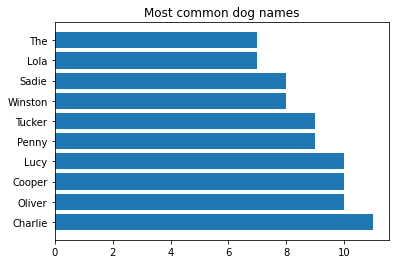

In [70]:
names = twitter_cleaned['name'].value_counts()[:10]
plt.barh(names.index, names.values)
plt.title('Most common dog names')

Exploring the dog stage
- Which dog stage has the most rating? 

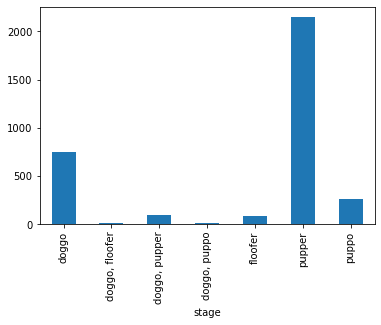

In [72]:
twitter_cleaned.groupby("stage")['rating_numerator'].sum().plot(kind='bar');


Exploring the retweet_count and avorite_count variables
- Is there a relationship between retweet_count and avorite_count?

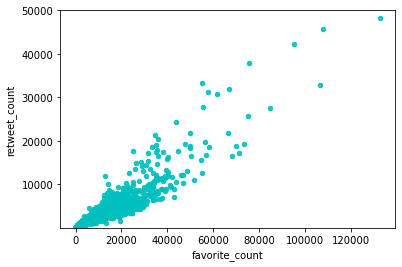

In [73]:
twitter_cleaned.plot(y='retweet_count',x='favorite_count', kind="scatter", color='c',
                     alpha=0.9,ylim=[10,50000]);

Exploring the rating_numerator and favorite_count variables
- Is there a relationship between rating and favorite_count?

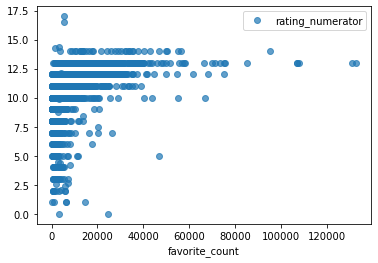

In [74]:
twitter_cleaned.plot(y='rating_numerator',x='favorite_count',style='o',alpha=.7);

Computing their statistics
- The averages of 'rating_numerator','retweet_count','favorite_count'

In [75]:
# statistic for'rating_numerator','retweet_count','favorite_count'
stats = twitter_cleaned[['rating_numerator','retweet_count','favorite_count']]
stats.describe()

,rating_numerator,retweet_count,favorite_count
count,1994.000000,1994.000000,1994.000000
mean,10.513410,2766.753260,8895.725677
std,2.253012,4674.698447,12213.193181
min,0.000000,16.000000,81.000000
25%,10.000000,624.750000,1982.000000
50%,11.000000,1359.500000,4136.000000
75%,12.000000,3220.000000,11308.000000
max,17.000000,79515.000000,132810.000000
